In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [5]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [6]:
from sklearn .preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
X_train.mean() , X_test.mean()

(Age                   37.864286
 EstimatedSalary    69807.142857
 dtype: float64,
 Age                   37.166667
 EstimatedSalary    69591.666667
 dtype: float64)

In [8]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
np.round(X_test.describe())

,Age,EstimatedSalary
count,120.0,120.0
mean,37.0,69592.0
std,11.0,32934.0
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.0,87000.0
max,60.0,150000.0


In [11]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


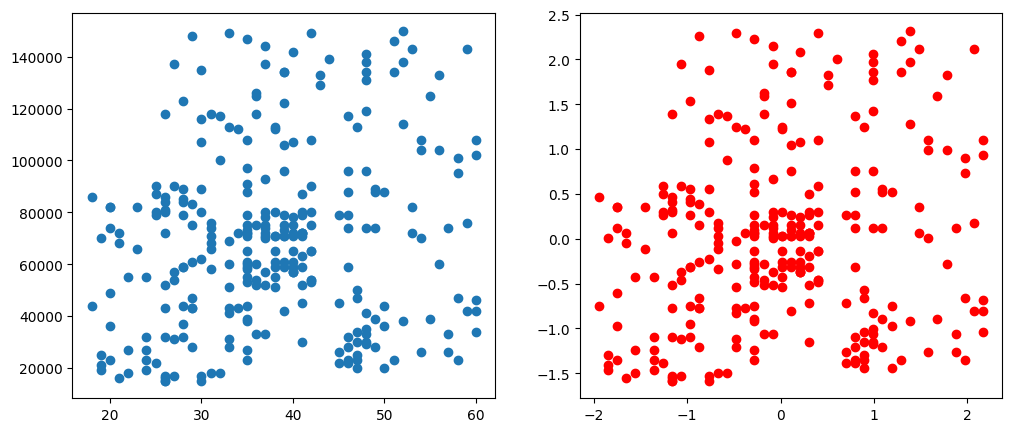

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
plt.show()

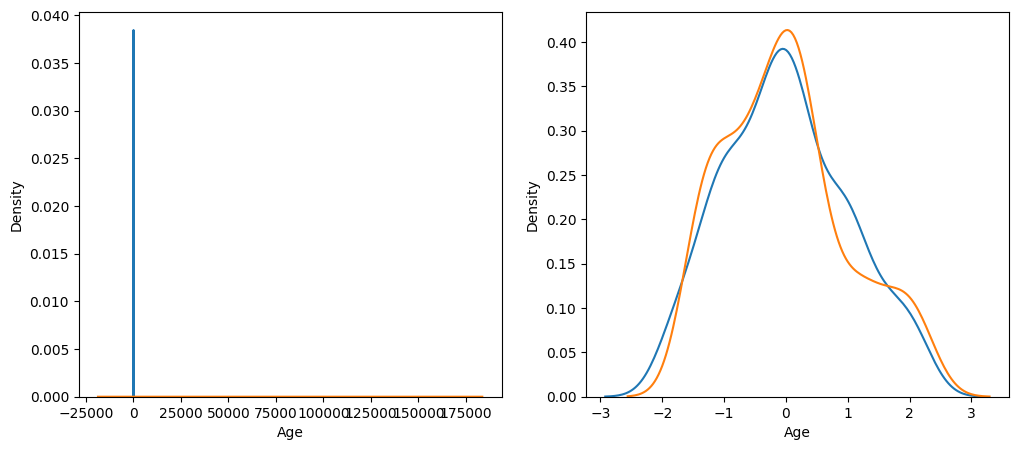

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

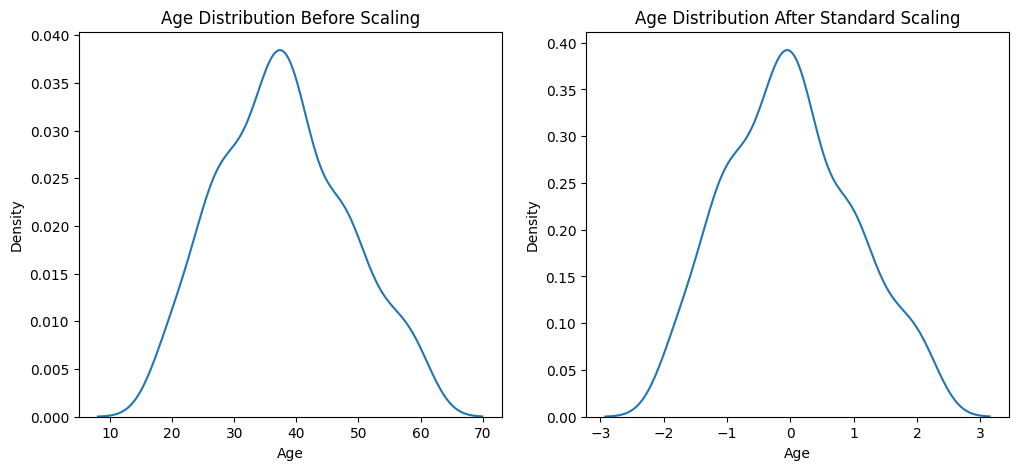

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [16]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
